In [13]:
#Possesion stats for teams
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 

PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/possession/Premier-League-Stats"

driver.get(url)

columns = ["Squad","Pl","Poss","90s","Touches","Touches Def Pen","Touches Def 3rd","Touches Mid 3rd","Touches Att 3rd","Touches Att Pen","Touches Live","Dribbles Succ","Dribbles Att","Dribbles Succ%","Dribbles #Pl","Dribbles Megs","Carries","Carries TotDist","Carries	PrgDist","Carries Prog","Carries 1/3","Carries CPA","Carries Mis","Carries Dis","Receiving Targ","Receiving Rec","Receiving Rec%","Receiving Prog"]

array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
for num in range(1, 21):
    try:
        team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_possession_for"]/tbody/tr['+str(num)+']')
        team_dat = str(team_dat.text)
        team_name = re.findall(all_team_space, team_dat)[0]
        team_dat = re.sub(team_name, '', team_dat)
        list_team_dat = team_dat.split(' ')
        full_list_team_dat = [team_name.strip()] + list_team_dat
        array.append(full_list_team_dat)
    except:
        break

pd.DataFrame(array, columns = columns).to_csv("Teams_poss_data.csv")


driver.find_element_by_xpath('//*[@id="all_stats_squads_possession"]/div[3]/div[2]/a').click()
time.sleep(2)
array = []
all_team_space ='|'.join(['vs Chelsea ', 'vs Tottenham ', 'vs Wolves ', 'vs Brentford ', 'vs Leeds United ', 'vs Leicester City ', 'vs Crystal Palace ', 'vs Liverpool ', 'vs Manchester City ', 'vs Everton ', 'vs Manchester Utd ', 'vs Norwich City ', 'vs Arsenal ', 'vs Burnley ', 'vs Brighton ', 'vs Aston Villa ', 'vs West Ham ', 'vs Newcastle Utd ', 'vs Watford ', 'vs Southampton '])
for num in range(1, 21):
    team_dat = driver.find_element_by_xpath('//*[@id="stats_squads_possession_against"]/tbody/tr['+str(num)+']')
    team_dat = str(team_dat.text)
    team_name = re.findall(all_team_space, team_dat)[0]
    team_dat = re.sub(team_name, '', team_dat)
    list_team_dat = team_dat.split(' ')
    full_list_team_dat = [team_name.strip()] + list_team_dat
    array.append(full_list_team_dat)

pd.DataFrame(array, columns = columns).to_csv("Opponent_poss_data_agaisnt_team.csv")

driver.quit()




SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 96
Current browser version is 95.0.4638.69 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [17]:
#Possession stats for teams

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from send2trash import send2trash
from itertools import combinations
from itertools import product
from collections import defaultdict
import unicodedata
from datetime import datetime 
import numpy as np

PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://fbref.com/en/comps/9/possession/Premier-League-Stats"

driver.get(url)


columns = ["Player","Nation","Pos","Squad","Age","Born","90s","Touches","Touches Def Pen","Touches Def 3rd","Touches Mid 3rd","Touches Att 3rd","Touches Att Pen","Touches Live","Dribbles Succ","Dribbles Att","Dribbles Succ%","Dribbles #Pl","Dribbles Megs","Carries","Carries TotDist","Carries PrgDist","Carries Prog","Carries 1/3","Carries	CPA","Carries Mis","Carries Dis","Receiving	Targ","Receiving Rec","Receiving Rec%","Receiving Prog"]
array = []
all_team_space ='|'.join(['Chelsea ', 'Tottenham ', 'Wolves ', 'Brentford ', 'Leeds United ', 'Leicester City ', 'Crystal Palace ', 'Liverpool ', 'Manchester City ', 'Everton ', 'Manchester Utd ', 'Norwich City ', 'Arsenal ', 'Burnley ', 'Brighton ', 'Aston Villa ', 'West Ham ', 'Newcastle Utd ', 'Watford ', 'Southampton '])
positions = '[GKDFMW,]{2,}'
for num in range(1, 431):
    try:
        lists = []
        for td_num, col_name in zip(range(1, 32), columns):
            player_dat = driver.find_element_by_xpath('//*[@id="stats_possession"]/tbody/tr['+str(num)+']/td['+str(td_num)+']')
            dat = str(player_dat.text)
            if dat == '':
                dat = np.nan
            if col_name == 'Nation':
                dat = re.findall('[A-Z]+', dat)[0]
            lists.append(dat)
        array.append(lists)
    except:
        continue
    
pd.DataFrame(array, columns = columns).to_csv("Player_possession.csv")
driver.quit()

[WDM] - 

[WDM] - ====== WebDriver manager ======


KeyboardInterrupt: 

Low Possession teams


,Squad,Poss,Receiving Rec%,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Succ,Dribbles Succ%
4,Burnley,39.4,75.6,551,1340,1862,1312,182,60,55.0
13,Newcastle Utd,40.3,82.3,615,1678,1801,1143,202,81,55.1
7,Everton,41.3,78.8,607,1697,1795,1308,224,59,48.4
17,Watford,41.9,81.4,699,1871,1836,1047,166,100,61.0
2,Brentford,42.8,74.5,692,1809,1856,1057,192,59,58.4
14,Norwich City,43.9,84.0,821,2267,1961,960,156,91,52.3
0,Arsenal,47.1,87.8,612,1746,2296,1467,237,68,50.4
15,Southampton,48.0,81.3,505,1572,2305,1409,209,92,55.4
1,Aston Villa,48.1,80.8,583,1571,2053,1218,224,79,59.4
19,Wolves,49.9,84.7,572,1769,2426,1387,202,111,62.7



High Possession teams


,Squad,Poss,Receiving Rec%,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Succ,Dribbles Succ%
11,Manchester City,63.8,89.9,525,1624,3464,2177,395,91,58.3
10,Liverpool,61.7,87.1,583,1753,3331,1941,332,63,45.7
8,Leeds United,59.3,85.1,729,2270,2504,1385,236,79,50.6
12,Manchester Utd,57.2,86.7,523,1673,2892,1883,256,95,60.9
3,Brighton,56.3,85.3,748,2395,2377,1585,227,66,57.4
5,Chelsea,54.8,87.9,725,2177,2811,1595,243,88,60.3
6,Crystal Palace,52.7,86.3,683,2025,2693,1393,223,87,53.7
9,Leicester City,51.3,83.8,733,2101,2683,1125,214,66,51.6
18,West Ham,50.7,84.5,530,1651,2485,1588,245,57,50.9
16,Tottenham,50.7,85.7,621,1711,2788,1295,180,86,52.1



Low threat teams


,Squad,Poss,Receiving Rec%,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Succ,Dribbles Succ%
14,Norwich City,43.9,84.0,821,2267,1961,960,156,91,52.3
17,Watford,41.9,81.4,699,1871,1836,1047,166,100,61.0
16,Tottenham,50.7,85.7,621,1711,2788,1295,180,86,52.1
4,Burnley,39.4,75.6,551,1340,1862,1312,182,60,55.0
2,Brentford,42.8,74.5,692,1809,1856,1057,192,59,58.4
19,Wolves,49.9,84.7,572,1769,2426,1387,202,111,62.7
13,Newcastle Utd,40.3,82.3,615,1678,1801,1143,202,81,55.1
15,Southampton,48.0,81.3,505,1572,2305,1409,209,92,55.4
9,Leicester City,51.3,83.8,733,2101,2683,1125,214,66,51.6
6,Crystal Palace,52.7,86.3,683,2025,2693,1393,223,87,53.7



High threat teams


,Squad,Poss,Receiving Rec%,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Dribbles Succ,Dribbles Succ%
11,Manchester City,63.8,89.9,525,1624,3464,2177,395,91,58.3
10,Liverpool,61.7,87.1,583,1753,3331,1941,332,63,45.7
12,Manchester Utd,57.2,86.7,523,1673,2892,1883,256,95,60.9
18,West Ham,50.7,84.5,530,1651,2485,1588,245,57,50.9
5,Chelsea,54.8,87.9,725,2177,2811,1595,243,88,60.3
0,Arsenal,47.1,87.8,612,1746,2296,1467,237,68,50.4
8,Leeds United,59.3,85.1,729,2270,2504,1385,236,79,50.6
3,Brighton,56.3,85.3,748,2395,2377,1585,227,66,57.4
7,Everton,41.3,78.8,607,1697,1795,1308,224,59,48.4
1,Aston Villa,48.1,80.8,583,1571,2053,1218,224,79,59.4


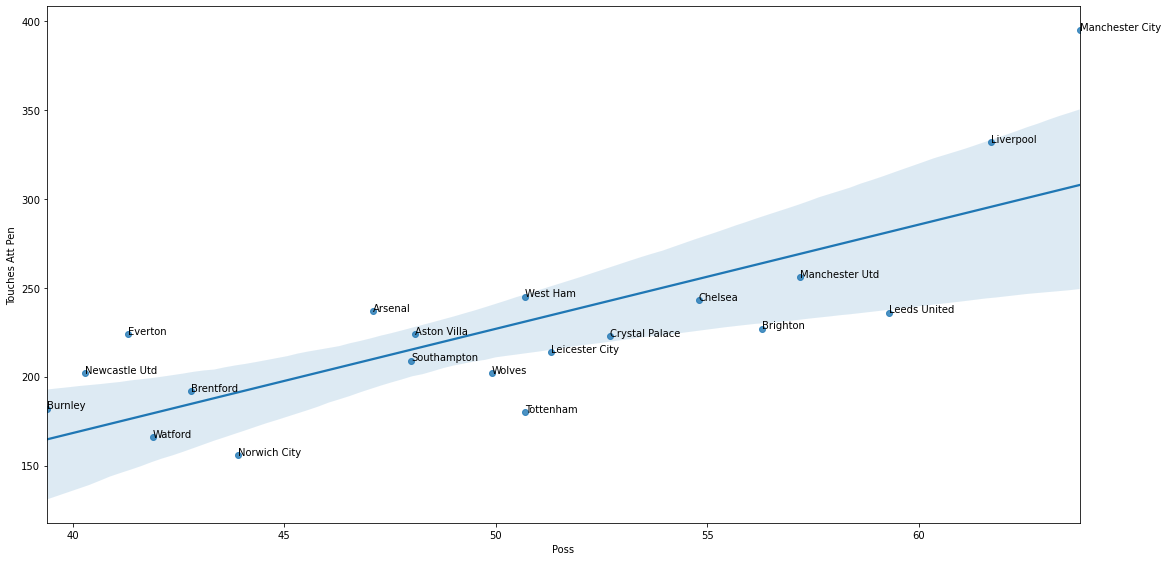

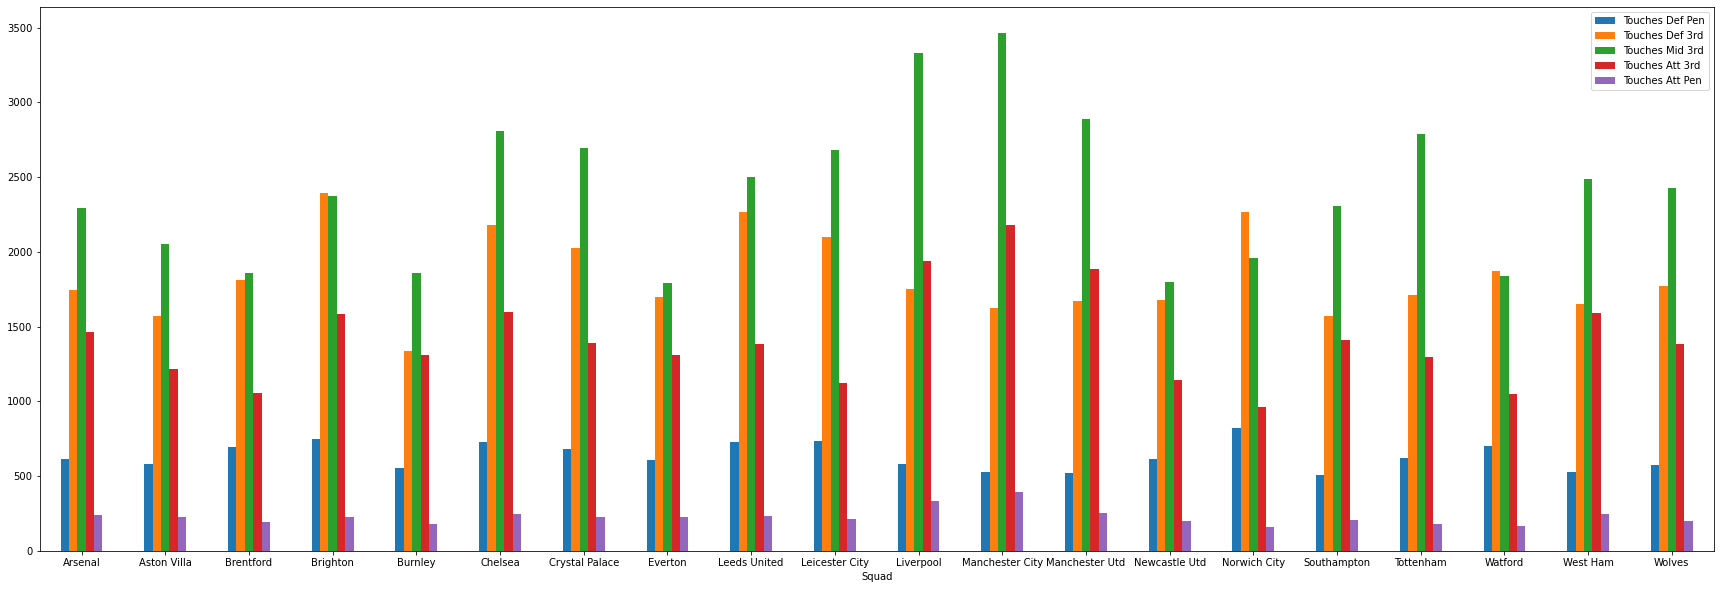

In [2]:
# Variety of attempted passes for each team
# Short 5-15 yards
# Med 15-30 yards
# Long 30+ yards

import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

os.chdir(r"/Users/jordandass/FPL/Possesion stats")
df = pd.read_csv("Teams_poss_data.csv")
df2 = pd.read_csv("Opponent_poss_data_agaisnt_team.csv")
os.chdir(r"/Users/jordandass/FPL/Shooting stats")
gca_df = pd.read_csv("Teams_gca_data.csv")
shoot_df = pd.read_csv("Teams_shot_data.csv")

return_df = df[["Squad","Poss", "Receiving Rec%", "Touches Def Pen", "Touches Def 3rd", "Touches Mid 3rd", "Touches Att 3rd", "Touches Att Pen", "Dribbles Succ", "Dribbles Succ%"]]

print("Low Possession teams")
display(return_df.sort_values(by = ["Poss"], ascending = [True]).head(10))
print('')
print("High Possession teams")
display(return_df.sort_values(by = ["Poss"], ascending = [False]).head(10))
print('')
print("Low threat teams")
display(return_df.sort_values(by = ["Touches Att Pen"], ascending = [True]).head(10))
print('')
print("High threat teams")
display(return_df.sort_values(by = ["Touches Att Pen"], ascending = [False]).head(10))
print('')

scatter1 = sns.regplot(x = return_df["Poss"], y = return_df["Touches Att Pen"])
scatter1.figure.set_size_inches(18.5, 9.5)
for i, txt in enumerate(return_df.Squad):
    scatter1.annotate(txt, (return_df["Poss"].iat[i],return_df["Touches Att Pen"].iat[i]))


diverse_df_tou = df[["Squad", "Touches Def Pen", "Touches Def 3rd", "Touches Mid 3rd", "Touches Att 3rd", "Touches Att Pen"]].set_index("Squad")
barplot1 = diverse_df_tou.plot.bar(rot=0, figsize=(30, 10))


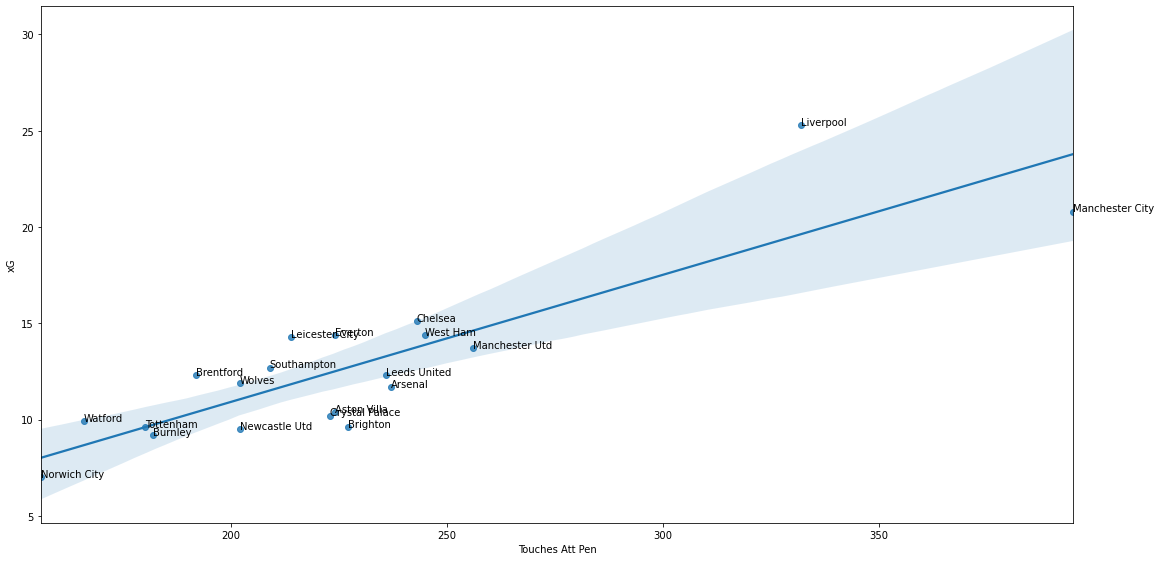

In [12]:
scatter1 = sns.regplot(x = df["Touches Att Pen"], y = shoot_df["xG"])
scatter1.figure.set_size_inches(18.5, 9.5)
for i, txt in enumerate(return_df.Squad):
    scatter1.annotate(txt, (df["Touches Att Pen"].iat[i],shoot_df["xG"].iat[i]))

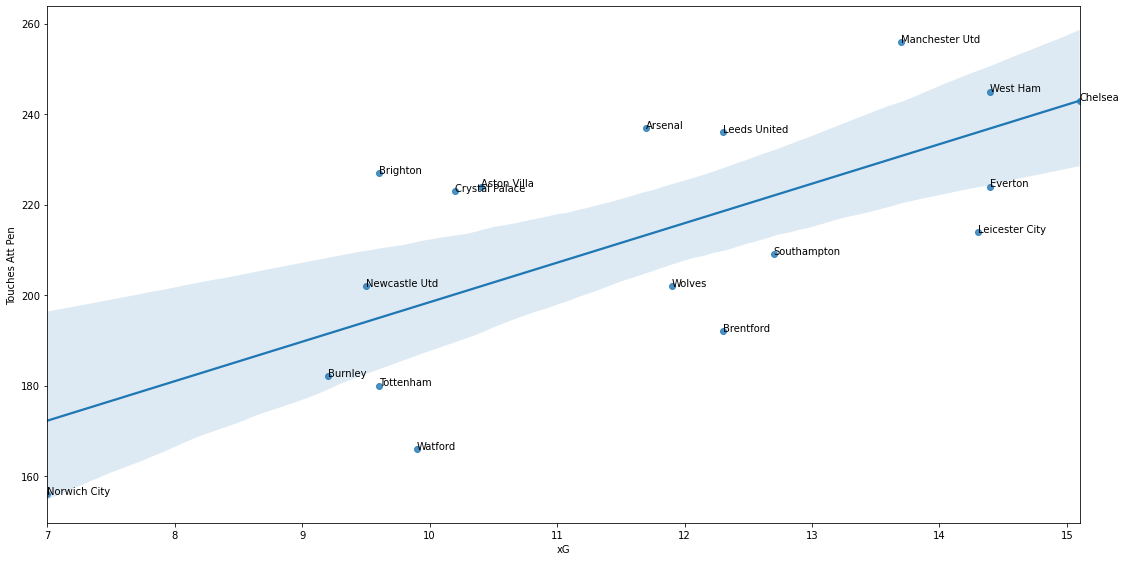

In [7]:
shoot_df_outliers = shoot_df[(shoot_df["Squad"] != 'Manchester City') & (shoot_df["Squad"] != 'Liverpool')]
return_df_outliers = return_df[(return_df["Squad"] != 'Manchester City') & (return_df["Squad"] != 'Liverpool')]
scatter1 = sns.regplot(x = shoot_df_outliers["xG"], y = return_df_outliers["Touches Att Pen"])
scatter1.figure.set_size_inches(18.5, 9.5)
for i, txt in enumerate(return_df_outliers.Squad):
    scatter1.annotate(txt, (shoot_df_outliers["xG"].iat[i],return_df_outliers["Touches Att Pen"].iat[i]))

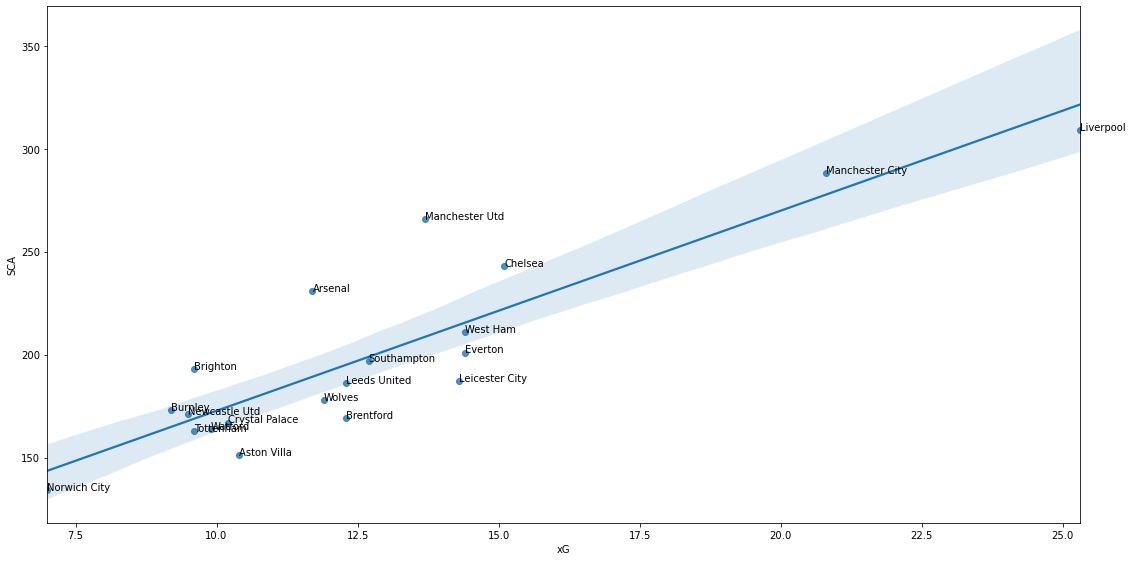

In [9]:
scatter1 = sns.regplot(x = shoot_df["xG"], y = gca_df["SCA"])
scatter1.figure.set_size_inches(18.5, 9.5)
for i, txt in enumerate(return_df.Squad):
    scatter1.annotate(txt, (shoot_df["xG"].iat[i],gca_df["SCA"].iat[i]))

,Factors,Leeds United,Manchester City
0,Poss,3,1
1,Touches Att Pen,7,1
2,xG,10,2
3,G/Sh,17,5
4,G-xG,18,15
5,Pressures %,6,10
6,Sh,9,19


,Factors,Leeds United normally,Teams agaisnt Manchester City,Higher/Lower,% change
0,Poss,59.30,36.20,Lower,-0.389545
1,Touches Att Pen,236.00,143.00,Lower,-0.394068
2,xG,12.30,6.40,Lower,-0.479675
3,G/Sh,0.06,0.05,Lower,-0.166667
4,G-xG,-4.30,-2.40,Higher,-0.441860
5,Pressures %,30.50,24.00,Lower,-0.213115
6,Sh,42.00,63.00,Higher,0.500000


,Factors,Manchester City normally,Teams agaisnt Leeds United,Higher/Lower,% change
0,Poss,63.80,40.7,Lower,-0.362069
1,Touches Att Pen,395.00,213.0,Lower,-0.460759
2,xG,20.80,15.7,Lower,-0.245192
3,G/Sh,0.12,0.1,Lower,-0.166667
4,G-xG,-1.80,-0.7,Higher,-0.611111
5,Pressures %,29.30,30.3,Higher,0.034130
6,Sh,27.00,43.0,Higher,0.592593


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
258,258,Illan Meslier,fr FRA,GK,Leeds United,21-238,2000,9.0,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
70,70,Liam Cooper,sct SCO,DF,Leeds United,30-057,1991,9.0,0,3,...,NaN,11.3,0,0,0,0.2,0.2,0.07,-0.2,-0.2
80,80,Stuart Dallas,nir NIR,"DF,MF",Leeds United,30-190,1991,8.9,0,11,...,0.0,21.4,0,0,0,0.9,0.9,0.08,-0.9,-0.9
371,371,Pascal Struijk,nl NED,"DF,MF",Leeds United,22-076,1999,5.3,0,1,...,NaN,8.5,0,0,0,0.0,0.0,0.05,0.0,0.0
121,121,Junior Firpo,es ESP,DF,Leeds United,25-065,1996,5.2,0,3,...,NaN,17.2,0,0,0,0.2,0.2,0.06,-0.2,-0.2
23,23,Luke Ayling,eng ENG,DF,Leeds United,30-062,1991,5.0,1,4,...,1.0,19.2,0,0,0,0.2,0.2,0.05,0.8,0.8


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
80,80,Stuart Dallas,nir NIR,"DF,MF",Leeds United,30-190,1991,8.9,0,11,...,0.00,21.4,0,0,0,0.9,0.9,0.08,-0.9,-0.9
93,93,Raphael Dias Belloli,br BRA,"MF,FW",Leeds United,24-316,1996,7.1,3,27,...,0.38,20.5,1,0,0,2.5,2.5,0.09,0.5,0.5
324,324,Rodrigo,es ESP,"FW,MF",Leeds United,30-234,1991,6.5,1,11,...,0.00,18.7,0,1,1,1.7,1.0,0.09,-0.7,-1.0
196,196,Mateusz Klich,pl POL,MF,Leeds United,31-135,1990,6.2,1,15,...,0.11,20.8,0,0,0,1.2,1.2,0.08,-0.2,-0.2
297,297,Kalvin Phillips,eng ENG,MF,Leeds United,25-328,1995,6.0,0,5,...,NaN,22.6,0,0,0,0.2,0.2,0.04,-0.2,-0.2


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
93,93,Raphael Dias Belloli,br BRA,"MF,FW",Leeds United,24-316,1996,7.1,3,27,...,0.38,20.5,1,0,0,2.5,2.5,0.09,0.5,0.5
324,324,Rodrigo,es ESP,"FW,MF",Leeds United,30-234,1991,6.5,1,11,...,0.00,18.7,0,1,1,1.7,1.0,0.09,-0.7,-1.0
153,153,Jack Harrison,eng ENG,"MF,FW",Leeds United,24-340,1996,5.5,0,6,...,0.00,19.2,0,0,0,0.4,0.4,0.06,-0.4,-0.4
28,28,Patrick Bamford,eng ENG,FW,Leeds United,28-051,1993,4.8,1,15,...,0.25,13.5,0,0,0,3.0,3.0,0.20,-2.0,-2.0


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
106,106,Ederson,br BRA,GK,Manchester City,28-070,1993,8.0,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
51,51,João Cancelo,pt POR,DF,Manchester City,27-152,1994,9.0,0,17,...,0.0,22.8,1,0,0,1.3,1.3,0.08,-1.3,-1.3
94,94,Rúben Dias,pt POR,DF,Manchester City,24-165,1997,8.2,0,3,...,NaN,6.9,0,0,0,0.2,0.2,0.06,-0.2,-0.2
210,210,Aymeric Laporte,es ESP,DF,Manchester City,27-152,1994,6.8,1,11,...,1.0,9.9,0,0,0,1.1,1.1,0.10,-0.1,-0.1
403,403,Kyle Walker,eng ENG,DF,Manchester City,31-151,1990,6.5,0,4,...,0.0,22.1,1,0,0,0.1,0.1,0.04,-0.1,-0.1
4,4,Nathan Aké,nl NED,DF,Manchester City,26-250,1995,3.0,0,1,...,NaN,6.0,0,0,0,0.2,0.2,0.20,-0.2,-0.2


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
356,356,Bernardo Silva,pt POR,MF,Manchester City,27-077,1994,7.4,2,9,...,0.50,11.3,0,0,0,1.2,1.2,0.13,0.8,0.8
146,146,Jack Grealish,eng ENG,"FW,MF",Manchester City,26-046,1995,7.3,1,15,...,0.14,16.1,0,0,0,2.0,2.0,0.13,-1.0,-1.0
323,323,Rodri,es ESP,MF,Manchester City,25-126,1996,7.0,1,7,...,1.00,22.2,0,0,0,0.3,0.3,0.04,0.7,0.7
151,151,İlkay Gündoğan,de GER,MF,Manchester City,31-002,1990,5.6,2,14,...,0.67,14.7,2,0,0,2.3,2.3,0.16,-0.3,-0.3
86,86,Kevin De Bruyne,be BEL,MF,Manchester City,30-120,1991,3.4,2,12,...,0.67,18.2,0,0,0,0.9,0.9,0.08,1.1,1.1


,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
146,146,Jack Grealish,eng ENG,"FW,MF",Manchester City,26-046,1995,7.3,1,15,...,0.14,16.1,0,0,0,2.0,2.0,0.13,-1.0,-1.0
177,177,Gabriel Jesus,br BRA,FW,Manchester City,24-206,1997,6.5,2,15,...,0.33,12.6,0,0,0,2.4,2.4,0.16,-0.4,-0.4
122,122,Phil Foden,eng ENG,FW,Manchester City,21-151,2000,4.2,3,14,...,0.33,12.9,0,0,0,2.7,2.7,0.19,0.3,0.3
369,369,Raheem Sterling,eng ENG,FW,Manchester City,26-322,1994,4.1,1,13,...,0.25,12.7,0,0,0,1.7,1.7,0.13,-0.7,-0.7


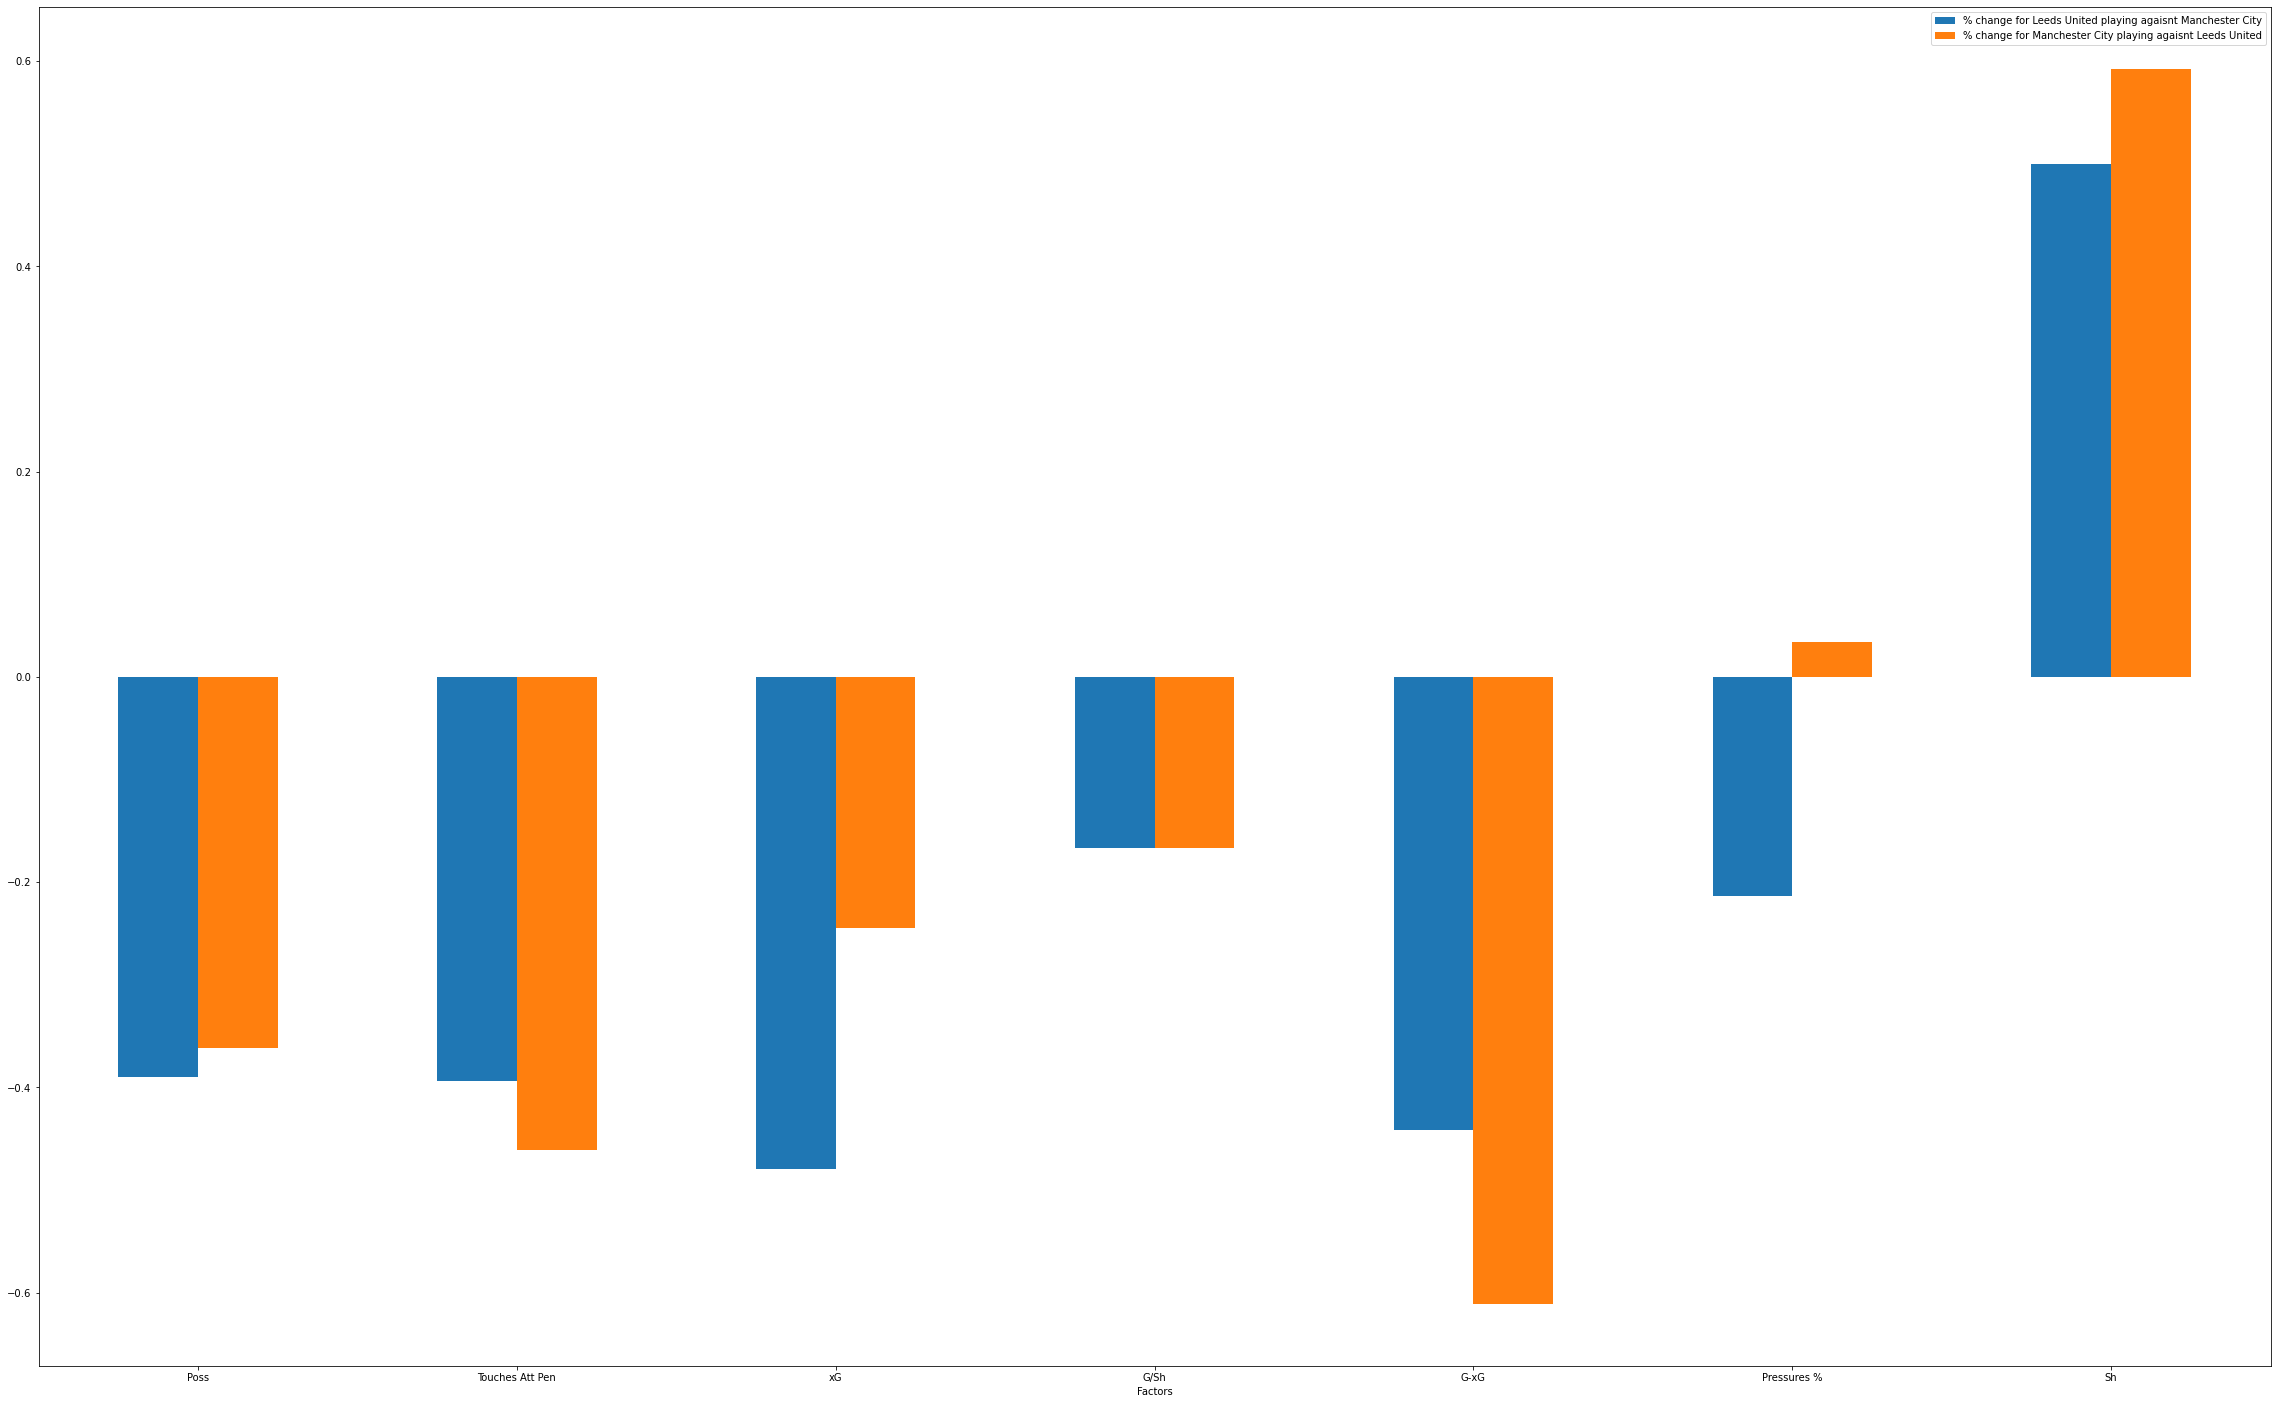

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import re
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import re
from collections import defaultdict
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from send2trash import send2trash
from webdriver_manager.chrome import ChromeDriverManager



# Get newest fixtures
def update_fixtures_fix(update):
    if update == True:
        PATH = "/Users/jordandass/Desktop/Drivers/chromedriver"

        driver = webdriver.Chrome(ChromeDriverManager().install())

        driver.get("https://fixturedownload.com/download/epl-2021-GMTStandardTime.csv")

        time.sleep(5)

        df = pd.read_csv (r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        send2trash(r'/Users/jordandass/Downloads/epl-2021-GMTStandardTime.csv')

        driver.quit()

        fixture = df
        df.to_csv("fixtures_raw.csv")
        return df
    else:
        df = pd.read_csv("fixtures_raw.csv")
        return df
    
def update_when_necessary_fix():
    os.chdir(r"/Users/jordandass/FPL")
    array_not_played = []
    time = pd.read_csv("fixtures_raw.csv")
    for num in range(len(time)):
        if type(time.iloc[num, 7]) == float:
            if pd.to_datetime(time.iloc[num, 3]) + timedelta(hours=10) < datetime.now():
                return update_fixtures_fix(update = True)
            else:
                return update_fixtures_fix(update = False)
            break

def two_team_analysis(team1, team2):
    rank_list_1, rank_list_2 = [], []
    team1_normally, team1_agaisnt, team2_normally, team2_agaisnt = [], [], [], []
    team1_normally_str = team1 + ' normally'
    team1_agaisnt_str = 'Teams agaisnt ' + team2
    vs_team1 = 'vs '+team1
    
    team2_normally_str = team2 + ' normally'
    team2_agaisnt_str = 'Teams agaisnt ' + team1
    vs_team2 = 'vs '+team2
    
    poss_important_factors = ['Poss', 'Touches Att Pen']
    os.chdir(r"/Users/jordandass/FPL/Possesion stats")
    poss_df = pd.read_csv("Teams_poss_data.csv")
    opp_poss_df = pd.read_csv("Opponent_poss_data_agaisnt_team.csv")
    for factor in poss_important_factors:
        sorted_poss_df = poss_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_poss_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(poss_df[poss_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_poss_df[opp_poss_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(poss_df[poss_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_poss_df[opp_poss_df["Squad"] == vs_team1][factor].values[0])
    
    shoot_important_factors = ['xG', 'G/Sh', 'G-xG']
    os.chdir(r"/Users/jordandass/FPL/Shooting stats")
    shoot_df = pd.read_csv("Teams_shot_data.csv")
    opp_shoot_df = pd.read_csv("Opponent_shot_data_agaisnt_team.csv")
    for factor in shoot_important_factors:
        sorted_shoot_df = shoot_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_shoot_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(shoot_df[shoot_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_shoot_df[opp_shoot_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(shoot_df[shoot_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_shoot_df[opp_shoot_df["Squad"] == vs_team1][factor].values[0])
    
    def_important_factors = ['Pressures %', 'Sh']
    os.chdir(r"/Users/jordandass/FPL/Defensive stats")
    def_df = pd.read_csv("Teams_def_data.csv")
    opp_def_df = pd.read_csv("Opponent_def_data_agaisnt_team.csv")
    for factor in def_important_factors:
        sorted_def_df = def_df.sort_values(by = [factor], ascending = [False])
        rank = 0
        for team in sorted_def_df["Squad"]:
            rank += 1
            if team == team1:
                rank_list_1.append(rank)
            elif team == team2:
                rank_list_2.append(rank)
        team1_normally.append(def_df[def_df["Squad"] == team1][factor].values[0])
        team1_agaisnt.append(opp_def_df[opp_def_df["Squad"] == vs_team2][factor].values[0])
        team2_normally.append(def_df[def_df["Squad"] == team2][factor].values[0])
        team2_agaisnt.append(opp_def_df[opp_def_df["Squad"] == vs_team1][factor].values[0])
                
    columns = poss_important_factors + shoot_important_factors + def_important_factors
    display(pd.DataFrame({'Factors':columns , team1: rank_list_1, team2:rank_list_2}))
    
    team1_df = pd.DataFrame({'Factors':columns, team1_normally_str: team1_normally, team1_agaisnt_str: team1_agaisnt})
    check_list = []
    percent_list1 = []
    for factor in team1_df['Factors']:
        percent_list1.append((team1_df[team1_df["Factors"] == factor][team1_agaisnt_str].values[0] - team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0])/team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0])
        if team1_df[team1_df["Factors"] == factor][team1_normally_str].values[0] < team1_df[team1_df["Factors"] == factor][team1_agaisnt_str].values[0]:
            check_list.append('Higher')
        else:
            check_list.append('Lower')
            
    team1_df["Higher/Lower"] = check_list
    team1_df["% change"] = percent_list1
    display(team1_df)

    
    team2_df = pd.DataFrame({'Factors':columns, team2_normally_str: team2_normally, team2_agaisnt_str: team2_agaisnt})
    check_list = []
    percent_list2 = []
    for factor in team2_df['Factors']:
        percent_list2.append((team2_df[team2_df["Factors"] == factor][team2_agaisnt_str].values[0] - team2_df[team2_df["Factors"] == factor][team2_normally_str].values[0])/team2_df[team2_df["Factors"] == factor][team2_normally_str].values[0])
        if team2_df[team1_df["Factors"] == factor][team2_normally_str].values[0] < team2_df[team2_df["Factors"] == factor][team2_agaisnt_str].values[0]:
            check_list.append('Higher')
        else:
            check_list.append('Lower')
    team2_df["Higher/Lower"] = check_list
    team2_df["% change"] = percent_list2
    display(team2_df)
    
    percent_change_team1_str = '% change for ' + team1 + ' playing agaisnt ' + team2
    percent_change_team2_str = '% change for ' + team2 + ' playing agaisnt ' + team1
    combined_percent_df = pd.DataFrame({'Factors':columns, percent_change_team1_str:percent_list1, percent_change_team2_str:percent_list2})
                                        
    barplot1 = combined_percent_df.set_index("Factors").plot.bar(rot=0, figsize=(40, 25))
    
    positions = ['GK', 'DF', 'MF', 'FW']
    formations = [1, 5, 5, 4]
    os.chdir(r"/Users/jordandass/FPL/Shooting stats")
    shoot_df = pd.read_csv("Player_shot.csv")
    for team in [team1, team2]:
        full_team = shoot_df[shoot_df["Squad"] == team]
        for pos, num in zip(positions,formations):
            filter_pos = full_team.Pos.str.contains(pos)
            display(full_team[filter_pos].sort_values(by = '90s', ascending = False).head(num))
            played_players = full_team[filter_pos].sort_values(by = '90s', ascending = False).head(num)
            
two_team_analysis('Leeds United', 'Manchester City')    